<a href="https://colab.research.google.com/github/KarthiRangasamy/AIML/blob/main/Low_Code_NLP_RAG_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

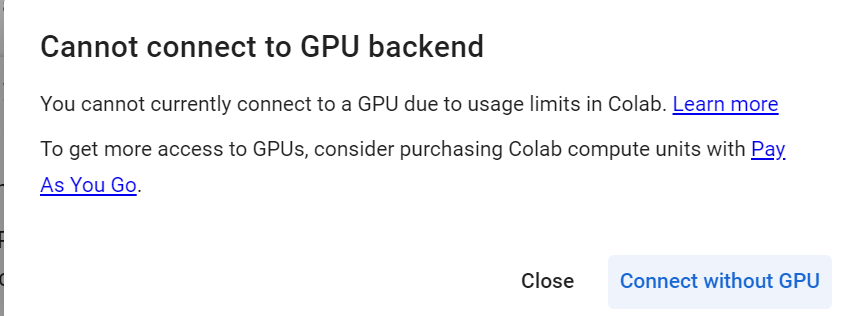

## Installing and Importing Necessary Libraries and Dependencies

In [1]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q


# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 251.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 288.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 207.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.1.1 requires numpy<2,>=1, but you have numpy 2.2.6 which is incompatible.
langchain-community 0.0.13 requires numpy<2,>=1, but you have numpy 2.2.6 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
numba 0.60.0

In [2]:
# For installing the libraries & downloading models from HF Hub
# !pip install huggingface_hub==0.23.2 pandas==1.5.3 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 numpy==1.25.2 -q


In [3]:
!pip install --force-reinstall numpy==1.26.0
!pip install --force-reinstall pandas==2.2.0

  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
  Using cached pandas-2.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  

In [1]:
!pip install huggingface_hub>=0.25.0 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 -q
#pandas==2.2.0
#numpy<2,>=1

In [2]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [3]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [4]:
model_path = hf_hub_download(
    repo_id= model_name_or_path, #Complete the code to mention the repo id
    filename= model_basename #Complete the code to mention the model name
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [5]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

### Response

In [6]:
def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [7]:
response("What treatment options are available for managing hypertension?")

'\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems such as heart disease, stroke, and kidney damage. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity'

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [8]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\n\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:\n\n1. Early recognition: Recognize the signs and symptoms of sepsis early and initiate treatment as soon as possible. Sepsis can present with various clinical features, including fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis.\n2. Resusc'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [9]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to define the query #2
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain may start as a mild discomfort around the navel or in the lower right abdomen, which then gradually moves to the right lower quadrant and becomes more severe over time. The pain may be constant or intermittent and is often worsened by movement, coughing, or deep breathing'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [10]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to define the query #3
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, or eyelashes.\n\nThe exact cause of alopecia areata is not known, but it's believed to be related to a problem with the immune system. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications."

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [11]:
user_input_2 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to define the query #4
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nA person who has sustained a physical injury to brain tissue, also known as a traumatic brain injury (TBI), may require various treatments depending on the severity and location of the injury. Here are some common treatments recommended for TBIs:\n\n1. Emergency care: The first priority is to ensure the person's airway is clear, they are breathing, and their heart is beating normally. In severe cases, emergency surgery may be required to remove hematomas or other obstructions.\n2. Medications: Depending on the symptoms, medications may be prescribed to manage conditions such as"

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [12]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to define the query #5
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of shock, such as pale skin, rapid heartbeat, or shallow breathing. If you notice these symptoms, seek medical help immediately.\n3. Immobilize the leg: Use a splint, sl"

## Question Answering using LLM with Prompt Engineering

In [30]:
system_prompt = "Summarize it and show me only key values:" #Complete the code to define the system prompt

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [31]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\nThe protocol for managing sepsis in a critical care unit involves early recognition, rapid response, and appropriate treatment. Key components include:\n1. Recognition of sepsis: Identify patients with suspected infection and assess for signs of organ dysfunction using the Sequential Organ Failure Assessment (SOFA) score or other relevant tools.\n2. Rapid response: Initiate resuscitation efforts, including administering oxygen, fluids, and vasopressors as needed to maintain adequate tissue perfusion.\n3. Antimicrobial therapy: Start appropriate antimicrobial agents based on'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [32]:
user_input = system_prompt+"\n"+"What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small pouch located in the lower right side of the abdomen. Common symptoms include:\n\n1. Sudden and severe pain in the lower right abdomen, often starting around the navel and moving to the right.\n2. Loss of appetite and feeling sick to your stomach (nausea).\n3. Fever, which may be low-grade at first but can rise as high as 101°F (38.3°C) or more.\n4. Vomiting'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [33]:
user_input = system_prompt+"\n"+"What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nEffective Treatments/Solutions:\n1. Minoxidil (Rogaine): Over-the-counter topical medication that can help stimulate hair growth and slow down hair loss in some individuals.\n2. Finasteride (Propecia, Proscar): Prescription oral medication that blocks the conversion of testosterone to dihydrotestosterone, which is believed to contribute to hair loss.\n3. Corticosteroids: Topical or injected steroids can help reduce inflammation and suppress the immune system, potentially addressing underlying causes such as alopecia areata'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [34]:
user_input = system_prompt+"\n"+"What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n1. Medications: Depending on the specific symptoms, various medications may be prescribed to manage conditions such as seizures, pain, depression, and anxiety.\n2. Rehabilitation therapy: Physical, occupational, speech, and cognitive rehabilitation therapies can help improve functional abilities and compensate for impairments.\n3. Surgery: In some cases, surgical intervention may be necessary to remove hematomas or other lesions that are causing pressure on the brain.\n4. Assistive devices: Devices such as wheelchairs, braces, communication aids, and assistive'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [36]:
user_input = system_prompt+"\n"+"What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n1. Assess the severity of the fracture:\n   - Is it open or closed?\n   - Is there any signs of nerve or blood vessel damage?\n2. Provide first aid:\n   - Immobilize the leg using a splint or sling.\n   - Apply ice to reduce swelling and pain.\n   - Elevate the leg above heart level.\n3. Seek medical attention:\n   - Call for emergency services if necessary.\n   - Transport the person to the nearest hospital or medical facility.\n4. During transport:\n   - Keep the injured'

## Data Preparation for RAG

In [37]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
manual_pdf_path = "/content/drive/MyDrive/AIML/Projects/Medical Assistant/medical_diagnosis_manual.pdf" #Complete the code to define the file name

In [42]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [43]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [44]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
mailmetokr@gmail.com
TZAHBL3Y16
eant for personal use by mailmetokr@gm
shing the contents in part or full is liable 

Page Number : 2
mailmetokr@gmail.com
TZAHBL3Y16
This file is meant for personal use by mailmetokr@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.

Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    ...........................................................................................................................................................................................
5

#### Checking the number of pages

In [220]:
len(manual)

4114

### Data Chunking

In [274]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512, #Complete the code to define the chunk size
    chunk_overlap= 50 #Complete the code to define the chunk overlap
)

In [275]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [276]:
len(document_chunks)

8668

In [277]:
document_chunks[0].page_content

'mailmetokr@gmail.com\nTZAHBL3Y16\neant for personal use by mailmetokr@gm\nshing the contents in part or full is liable'

In [278]:
document_chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53\nChapter 1. Nutrition: General Considerations    ...........................................................................................

In [279]:
document_chunks[3].page_content

"275\nChapter 23. Approach to the Patient With Liver Disease    ...........................................................................................\n294\nChapter 24. Testing for Hepatic & Biliary Disorders    ......................................................................................................\n305\nChapter 25. Drugs & the Liver    ................................................................................................................................................\n308\nChapter 26. Alcoholic Liver Disease    ....................................................................................................................................\n314\nChapter 27. Fibrosis & Cirrhosis    ............................................................................................................................................\n322\nChapter 28. Hepatitis    ........................................................................................................

As expected, there are some overlaps

### Embedding

In [280]:
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2") #Complete the code to define the model name

In [281]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [282]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  384


True

In [283]:
embedding_1,embedding_2

([-0.06991403549909592,
  0.06425792723894119,
  0.041155219078063965,
  -0.04052267223596573,
  0.054326239973306656,
  -0.06923319399356842,
  0.0701482966542244,
  0.013637994416058064,
  0.0051142205484211445,
  -0.0053280252031981945,
  0.05970064550638199,
  -0.024160729721188545,
  0.016928011551499367,
  -0.06264989078044891,
  -0.0348861999809742,
  -0.024027567356824875,
  -0.04835573211312294,
  -0.013331527821719646,
  -0.08154506236314774,
  -0.005268525332212448,
  -0.08857406675815582,
  -0.0523788258433342,
  -0.0022911587730050087,
  0.0024218601174652576,
  -0.03852759301662445,
  -0.014289994724094868,
  -0.04550189524888992,
  0.04999993368983269,
  -0.07300490140914917,
  -0.056785449385643005,
  0.0663372203707695,
  0.0024891383945941925,
  0.02577020414173603,
  -0.008966614492237568,
  0.05096492916345596,
  0.03993629664182663,
  -0.03244686871767044,
  -0.01362660527229309,
  -0.0011752074351534247,
  -0.060897406190633774,
  -0.0629323273897171,
  -0.0419420

### Vector Database

In [284]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [285]:
vectorstore = Chroma.from_documents(
    document_chunks, #Complete the code to pass the document chunks
    embedding_model, #Complete the code to pass the embedding model
    persist_directory=out_dir
)

In [286]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

In [287]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
), model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [288]:
vectorstore.similarity_search("What is the protocol for managing sepsis in a critical care unit?",k=3) #Complete the code to pass a query and an appropriate k value

[Document(page_content='shaking chills, persistent fever, altered sensorium, hypotension, and GI symptoms (abdominal pain,\nnausea, vomiting, diarrhea) suggests sepsis or septic shock. Septic shock develops in 25 to 40% of\npatients with significant bacteremia.\nDiagnosis\nIf bacteremia, sepsis, or septic shock is suspected, cultures are obtained of blood and any other\nappropriate specimens (see p. 1166).\nTreatment\n• Antibiotics\nIn patients with suspected bacteremia, empiric antibiotics are given after appropriate cultures are\nobtained. Early treatment of bacteremia with an appropriate antimicrobial regimen appears to improve\nsurvival. Continuing therapy involves adjusting antibiotics according to the results of culture and\nsusceptibility testing, surgically draining any abscesses, and usually removing any internal devices that\nare the suspected source of bacteria.\nBiological Warfare and Terrorism\nBiological warfare is the use of microbiological agents for hostile purposes. S

### Retriever

In [289]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 3} #Complete the code to pass an appropriate k value
)

In [290]:
rel_docs = retriever.get_relevant_documents("What is the protocol for managing sepsis in a critical care unit?") #Complete the code to pass the query
rel_docs

[Document(page_content='shaking chills, persistent fever, altered sensorium, hypotension, and GI symptoms (abdominal pain,\nnausea, vomiting, diarrhea) suggests sepsis or septic shock. Septic shock develops in 25 to 40% of\npatients with significant bacteremia.\nDiagnosis\nIf bacteremia, sepsis, or septic shock is suspected, cultures are obtained of blood and any other\nappropriate specimens (see p. 1166).\nTreatment\n• Antibiotics\nIn patients with suspected bacteremia, empiric antibiotics are given after appropriate cultures are\nobtained. Early treatment of bacteremia with an appropriate antimicrobial regimen appears to improve\nsurvival. Continuing therapy involves adjusting antibiotics according to the results of culture and\nsusceptibility testing, surgically draining any abscesses, and usually removing any internal devices that\nare the suspected source of bacteria.\nBiological Warfare and Terrorism\nBiological warfare is the use of microbiological agents for hostile purposes. S

In [291]:
model_output = llm(
      "What is the protocol for managing sepsis in a critical care unit?", #Complete the code to pass the query
      max_tokens=50, #Complete the code to pass the maximum number of tokens
      temperature=.99, #Complete the code to pass the temperature
    )

Llama.generate: prefix-match hit


In [292]:
model_output['choices'][0]['text']

'\n\nSepsis is a life-threatening condition that can arise from an infection, and prompt recognition and management are essential to improve outcomes. In a critical care unit, the following steps should be taken for managing sepsis:\n'

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [293]:
qna_system_message = """

You are an assistant whose work is to give answers to questions with repect to a context.
User input will have the context required by you to answer user questions.

This context will begin with the token: ###Context.
The context contains references to specific portions of a document relevant to the user query.

User questions will begin with the token: ###Question.

Strictly answer only using the information provided in the ###Context.
Do not mention anything about the information in ###Context or the question in ###Question in your final answer.

If the answer to ###Question cannot be derived from the ###Context, just respond by saying "I don't know".

Remember that the answer to ###Question might not always be directly present in the information provided in the ###Context.
the answer can be indirectly derived from the information in ###Context.

"""

In [294]:
qna_user_message_template = """
###question
{question}


###context
{context}

"""


### Response Function

In [295]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [296]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,top_k=20)

Llama.generate: prefix-match hit


'Based on the context provided, sepsis is a condition characterized by shaking chills, persistent fever, altered sensorium, hypotension, and GI symptoms (abdominal pain, nausea, vomiting, diarrhea). Septic shock develops in 25 to 40% of patients with significant bacteremia. The treatment for sepsis involves obtaining cultures of blood and any other appropriate specimens, administering empiric antibiotics after cultures are obtained, adjusting antibiotics according to culture and susceptibility testing results, surgically draining abscesses,'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [297]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'enhanced CT is the most sensitive test for diagnosing acute appendicitis. Ultrasound is less expensive but\nless specific than CT. Both tests are useful in pregnant women and children.\nTreatment\n• Surgical removal of the appendix (appendectomy)\n• Antibiotics before surgery to prevent peritonitis\n• Laparoscopic or open procedure\nLaparoscopic appendectomy is the preferred surgical approach for most patients with acute appendicitis. It\nhas a shorter hospital stay and quicker recovery time than an open appendectomy.'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [298]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context, sudden patchy hair loss can be a symptom of Alopecia Areata, which is an autoimmune disorder affecting genetically susceptible people. The treatment options for Alopecia Areata include topical corticosteroids, oral antimalarials, corticosteroids, retinoids, or immunosuppressants. Therefore, the effective treatments for addressing sudden patchy hair loss are topical corticosteroids, oral antimalarials, corticosteroids, retinoids, and immunosuppressants. The possible causes behind sudden'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [299]:
user_input_2 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context, the recommended treatments for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function are:\n1. Preventing systemic complications due to immobilization (eg, pneumonia, UTI, thromboembolic disease)\n2. Providing good nutrition\n3. Preventing pressure ulcers\n4. Supportive care and rehabilitation services, particularly in cognitive and emotional areas, for patients whose coma exceeds 24 hours.\n5. Participation in support groups for the families of brain'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [300]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context provided, the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip would be:\n\n1. Treatment of life-threatening injuries if present.\n2. Splinting to prevent further injury and decrease pain. This can be done with a nonrigid or noncircumferential device.\n3. Definitive treatment, such as reduction, for certain injuries. This may require analgesia or sedation.\n4. Rest, ice, compression, and elevation (RICE) to prevent further injury, minimize sw'

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [301]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,temperature=0.5)

Llama.generate: prefix-match hit


'Based on the context provided, the answer to the question is:\n\nThe protocol for managing sepsis in a critical care unit involves obtaining cultures of blood and any other appropriate specimens if bacteremia, sepsis, or septic shock is suspected. Early treatment with empiric antibiotics is given after cultures are obtained, and continuing therapy involves adjusting antibiotics according to the results of culture and susceptibility testing, surgically draining any abscesses, and removing any internal devices that are the suspected source of bacteria.'

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [302]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'enhanced abdominal CT is the most sensitive and specific test for acute appendicitis. Ultrasound is less\nsensitive but can be used when CT is contraindicated (eg, in pregnant women) or unavailable.\nTreatment\n• Surgical removal of the appendix\n• Antibiotics to prevent complications from perforation\nAntibiotics alone are not a viable treatment option for acute appendicitis. The only definitive treatment\nis surgical removal of the appendix.'

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [303]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_2,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'###Answer:\nNonscarring alopecia, such as alopecia areata, can result from various causes including autoimmune disorders. Treatment options include topical corticosteroids and other medications like oral antimalarials, corticosteroids, retinoids, or immunosuppressants.'

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [304]:
user_input_2 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_2,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'Based on the information provided, the answer would be: "Supportive care including preventing systemic complications, providing good nutrition, and preventing pressure ulcers is recommended for a person with brain damage."'

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [305]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_2,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'Based on the context provided, a person who has fractured their leg during a hiking trip should follow these steps:\n1. Treatment for life-threatening injuries in the emergency department if necessary.\n2. Splinting to prevent further injury and decrease pain.\n3. Definitive treatment, such as reduction, which may require analgesia or sedation.\n4. Rest, ice, compression, and elevation (RICE) to prevent further injury, minimize swelling, and alleviate pain.\n5. Immobilization using a cast, splint, sling,'

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [306]:
groundedness_rater_system_message = """
You will be presented a ###Question, ###Context used by the AI system and AI generated ###Answer.

Your task is to judge the extent to which the ###Answer is derived from ###Context.

Rate it 1 - if The ###Answer is not derived from the ###Context at all
Rate it 2 - if The ###Answer is derived from the ###Context only to a limited extent
Rate it 3 - if The ###Answer is derived from ###Context to a good extent
Rate it 4 - if The ###Answer is derived from ###Context mostly
Rate it 5 - if The ###Answer is is derived from ###Context completely

Please note: Make sure you give a single overall rating in the range of 1 to 5 along with an overall explanation.

"""

In [307]:
relevance_rater_system_message = """

You will be presented with a ###Question, the ###Context used by the AI system to generate a response, and the AI-generated ###Answer.

Your task is to judge the extent to which the ###Answer is relevant to the ###Question, considering whether it directly addresses the key aspects of the ###Question based on the provided ###Context.

Rate the relevance as follows:
- Rate 1 – The ###Answer is not relevant to the ###Question at all.
- Rate 2 – The ###Answer is only slightly relevant to the **###Question**, missing key aspects.
- Rate 3 – The ###Answer is moderately relevant, addressing some parts of the **###Question** but leaving out important details.
- Rate 4 – The ###Answer is mostly relevant, covering key aspects but with minor gaps.
- Rate 5 – The ###Answer is fully relevant, directly answering all important aspects of the **###Question** with appropriate details from the **###Context**.

Note: Provide a single overall rating in the range of 1 to 5, along with a brief explanation of why you assigned that score.
"""

In [308]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [309]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [310]:
ground,rel = generate_ground_relevance_response(user_input="What is the protocol for managing sepsis in a critical care unit?",max_tokens=370)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 I would rate the answer as a 2. The context does provide some information about the diagnosis and initial treatment of sepsis with antibiotics. However, it does not go into detail about the specific protocol for managing sepsis in a critical care unit beyond what is mentioned. Therefore, the answer is derived from the context to a limited extent.

 Rating: 3

The answer provides some relevant information about the management of sepsis in a critical care unit, specifically early treatment with appropriate antibiotics, adjusting antibiotics based on culture and susceptibility testing, surgically draining abscesses, and removing suspected sources of bacteria. However, it does not cover all key aspects of the question as it does not mention other important interventions such as fluid resuscitation, vasopressor therapy, and supportive care. Therefore, the answer is moderately relevant but leaves out important details.


### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [311]:
ground,rel = generate_ground_relevance_response(user_input="What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?",max_tokens= 370) #Complete the code to pass the query #2 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Rating: 4 - The answer is derived from the context mostly. The answer correctly identifies the common symptoms of appendicitis as abdominal pain, anorexia, and abdominal tenderness based on the context. It also accurately states that the treatment for appendicitis is surgical removal, which is also mentioned in the context. However, the answer does not provide enough detail from the context to determine which specific surgical procedure should be followed to treat appendicitis.

 Rating: 4

Explanation: The AI-generated answer directly addresses the question about the common symptoms of appendicitis and whether it can be cured via medicine. It correctly states that the treatment is surgical removal, implying that there is no medical cure for appendicitis. However, it does not provide enough detail about the specific surgical procedure used to treat appendicitis, which was also a part of the original question.


### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [312]:
ground,rel = generate_ground_relevance_response(user_input="What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?",max_tokens=370) #Complete the code to pass the query #3 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Rating: 5 - The Answer is derived from the Context completely.

Explanation: The user's question asks about effective treatments and possible causes for sudden patchy hair loss, specifically mentioning localized bald spots on the scalp. The context provided in the text discusses various types of alopecia, including alopecia areata, which is characterized by sudden patchy hair loss. The text also mentions several treatment options for alopecia areata, such as topical corticosteroids and oral antimalarials, among others. Therefore, the answer directly addresses the user's question and is derived entirely from the context provided in the text.

 Rating: 5

Explanation: The AI-generated answer directly addresses both parts of the question by identifying alopecia areata as a cause of sudden patchy hair loss and suggesting various treatment options for it, which aligns with the information provided in the context.


### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [313]:
ground,rel = generate_ground_relevance_response(user_input="What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?",max_tokens=370) #Complete the code to pass the query #4 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Rating: 3 - The Answer is derived from the Context to a good extent.

Explanation: The Context mentions that there is no specific treatment for brain damage, but supportive care should be provided to prevent systemic complications, provide good nutrition, and prevent pressure ulcers. The Answer accurately reflects this information by stating that recommended treatments include supportive care such as preventing systemic complications, providing good nutrition, and preventing pressure ulcers. Additionally, the Context mentions that rehabilitation services may be required for patients whose coma exceeds 24 hours, which is also included in the Answer. However, the Answer goes beyond the Context by implying that the brain injury itself may not have any specific medical treatments or medications, based on the information provided in the Context.

 Rating: 5

Explanation: The question asks about treatments for a person with brain damage resulting in temporary or permanent impairment of brai

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [323]:
ground,rel = generate_ground_relevance_response(user_input="What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?",max_tokens=200) #Complete the code to pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Rating: 5 - The Answer is derived from the Context completely.

Explanation: The context provides a detailed description of the necessary precautions and treatment steps for various injuries sustained during a hiking trip, including fractured legs. The answer summarizes these steps accurately and comprehensively, making it a complete derivation from the context.

 Rating: 5

Explanation: The answer directly addresses all the key aspects of the question based on the context provided. It mentions the necessary precautions (treatment of life-threatening injuries, spl


## Actionable Insights and Business Recommendations


*   
*  
*



<font size=6 color='blue'>Power Ahead</font>
___